# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Оценки параметров.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 50 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
from itertools import product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set fig ratio
plt.rcParams["figure.figsize"] = (15,5)
sns.set(style='whitegrid', font_scale=1.2, palette='Set2')

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/estimators.html">ноутбук</a> с занятия по оценкам параметров.


---
### Задача 1.

Найдите оценку параметра $\theta$ методом моментов по выборке размера $n$ из распределения:
* $U(a, b), \theta=(a, b)$; 
* $Pois(\theta)$;
* $\mathcal{N}(a, \sigma^2), \theta=(a, \sigma)$.

Выводить характеристики вероятностных распределений (мат. ожидание, дисперсия) не требуется.

#### Метод моментов:
Рассмотрим метод моментов для выборки $\mathbb{X} = (X_1, X_2, \hdots, X_n) \sim {P} \in \{{P}_\theta, \theta \in \Theta\}$. Эта выборка распределена как-то по $P_\theta$ из всевозможных $\Theta$, где  $\Theta \subset \mathbb{R}$. Тогда решая следующую систему можно получить оценку на $\theta$:
\begin{equation}
\left\{
\begin{array}{lr}

\mathbb{E}_\theta X = \overline{X} \\
\mathbb{E}_\theta X^2 = \overline{X^2} \\
\vdots \\
\mathbb{E}_\theta X^d = \overline{X^d}
.
\end{array}
\right.
\end{equation}

#### $X \sim U(a, b), \quad \theta = (a, b)$
Для случая равномерного распределения рассмотрим первые 2 момента. Они равны:
\begin{equation}
\left\{
\begin{array}{lr}
\mathbb{E}_\theta X = \frac{\hat{a}+\hat{b}}{2} = \overline{X} \\
\mathbb{E}_\theta X^2 = \frac{\hat{a}^2 + \hat{a}\hat{b} + \hat{b}^2}{3}  =\overline{X^2}
\end{array}
\right.

\Rightarrow

\left\{
\begin{array}{lr}
\hat{a} = \overline{X} - \sqrt{3} \sqrt{\overline{X^2} - \overline{X}^2} \\
\hat{b} = \overline{X} + \sqrt{3} \sqrt{\overline{X^2} - \overline{X}^2}
\end{array}
\right.

\lor

\left\{
\begin{array}{lr}
\hat{a} = \overline{X} + \sqrt{3} \sqrt{\overline{X^2} - \overline{X}^2} \\
\hat{b} = \overline{X} - \sqrt{3} \sqrt{\overline{X^2} - \overline{X}^2}.
\end{array}
\right.

\Rightarrow

\left\{
\begin{array}{lr}
\hat{a} = \overline{X} - \sqrt{3} \sqrt{\overline{X^2} - \overline{X}^2} \\
\hat{b} = \overline{X} + \sqrt{3} \sqrt{\overline{X^2} - \overline{X}^2}
\end{array}
\right.

\end{equation}
Решая систему, получаем оценки на $a, b$. Здесь последнее следствие выполнено, поскольку $a < b$ всегда. Тогда получаем оценку на $\theta$:
\begin{equation}
\hat{\theta} = (\overline{X} - \sqrt{3} \sqrt{\overline{X^2} - \overline{X}^2}, \overline{X} + \sqrt{3} \sqrt{\overline{X^2} - \overline{X}^2})
\end{equation}

#### $X \sim Pois(\theta)$
Для случая распределения Пуассона рассмотрим первый момент, т.е. мат-ожидание:
\begin{equation}
\mathbb{E}_\theta X = \hat{\theta} = \overline{X}
\end{equation}

Это выражение сразу дает оценку для $\theta$.

#### $X \sim \mathcal{N}(a, \sigma^2), \quad \theta=(a, \sigma)$
Для случая нормального распределения рассмотрим первые 2 момента. Они очевидно равны:
\begin{equation}
\left\{
\begin{array}{lr}
\mathbb{E}_\theta X = a = \overline{X} \\
\mathbb{E}_\theta X^2 = \sigma^2 + a^2  =\overline{X^2}
\end{array}
\right.
\end{equation}

Тогда очевидно получаются оценки для $\theta$:
\begin{equation}
\hat{\theta} = (\overline{X}, \sqrt{\overline{X^2} - \overline{X}^2})
\end{equation}



---
### Задача 2.

Являются ли сильно состоятельными оценки, полученные в предыдущей задаче?

Для равномерного распределения *достаточно* выполнить визуальную проверку, в остальных случаях &mdash; *необходимо* привести теоретическое доказательство, используя известные вам теоретические утверждения.

#### Сильно состоятельная оценка
Оценка $\hat{\theta}$ называется сильно состоятельной оценкой $\theta$, если $\forall \theta \in \Theta: \hat{\theta_n} \xrightarrow{п.н.} \theta$.

#### $X \sim U(a, b), \quad \theta = (a, b)$
Из определения сильно состоятельной оценки очевидно, что выборочное среднее --- сильно состоятельная оценка мат-ожидания.

А также из определений сильно состоятельной оценки и дисперсии можно показать (было на лекции), что оценка $S^2 = \overline{X^2} - \overline{X}^2$ --- сильно состоятельная оценка дисперсии $X$.

\begin{equation}
\left\{
\begin{array}{lr}
\overline{X} \xrightarrow{п.н.} \mathbb{E} X = \frac{a+b}{2} \\
\overline{X^2} - \overline{X}^2 \xrightarrow{п.н.} \mathbb{D} X = \frac{(b-a)^2}{12}.
\end{array}
\right.
\end{equation}

Тогда:
\begin{equation}
\hat{\theta} = (\overline{X} - \sqrt{3} \sqrt{\overline{X^2} - \overline{X}^2}, \overline{X} + \sqrt{3} \sqrt{\overline{X^2} - \overline{X}^2}) \xrightarrow{п.н.}
 (\frac{a+b}{2} - \frac{b-a}{2}, \frac{a+b}{2} + \frac{b-a}{2}) = (a, b).
\end{equation}

А, значит оценка $\theta$ --- сильно состоятельная.


#### $X \sim Pois(\theta)$
Также из определения сильно состоятельной оценки очевидно, что выборочное среднее --- сильно состоятельная оценка мат-ожидания.
\begin{equation}
\overline{X} \xrightarrow{п.н.} \mathbb{E} X = \theta.
\end{equation}
А значит оценка является сильно состоятельной.

#### $X \sim \mathcal{N}(a, \sigma^2), \quad \theta=(a, \sigma)$

Аналогично  первому пункту.
\begin{equation}
\left\{
\begin{array}{lr}
\overline{X} \xrightarrow{п.н.} \mathbb{E} X = a \\
\overline{X^2} - \overline{X}^2 \xrightarrow{п.н.} \mathbb{D} X = \sigma^2.
\end{array}
\right.
\end{equation}

Тогда для $\theta$:
\begin{equation}
\hat{\theta} = (\overline{X}, \sqrt{\overline{X^2} - \overline{X}^2}) \xrightarrow{п.н.} (a, \sqrt{\sigma^2}) = (a, \sigma).
\end{equation}
А значит оценка на $\theta$ является сильно состоятельной.


---
### Задача 3.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

Обозначим искомое выражение за $S'^2$, раскроем скобки и сгруппируем:
\begin{equation}
\begin{align*}
S'^2 = &\frac{1}{n}\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2 = \frac{1}{n}\sum\limits_{i=1}^n \left( X_i^2 - 2X_i\overline{X} + \overline{X}\right) =
\frac{1}{n}\sum\limits_{i=1}^n \left( X_i^2 - \overline{X} \left( 2X_i - \overline{X}\right) \right) =\\
&\frac{1}{n}\sum\limits_{i=1}^n \left( X_i^2 - \frac{1}{n}\sum \limits_{j=1}^{n} X_j \cdot \left( 2X_i - \frac{1}{n}\sum \limits_{j=1}^{n} X_j\right) \right) =
\frac{1}{n}\sum\limits_{i=1}^n  X_i^2 - \frac{1}{n^2}\sum\limits_{i=1}^n \left(\sum \limits_{j=1}^{n} X_j \cdot \left( 2X_i - \frac{1}{n}\sum \limits_{j=1}^{n} X_j\right) \right)
\end{align*}
\end{equation}
Преобразуем оригинальную оценку т.е. раскроем скобки и сгруппируем:
\begin{equation}
S^2 = \overline{X^2}-\overline{X}^2 = \frac{1}{n}\sum \limits_{i=1}^{n} X_i^2 - \left(\frac{1}{n}\sum \limits_{i=1}^{n} X_i \right)^2 =
\frac{1}{n}\sum \limits_{i=1}^{n} X_i^2 - \frac{1}{n^2} \sum \limits_{i=1}^{n}  \left( X_i \sum \limits_{j=1}^{n} X_j \right)
\end{equation}

После преобразований видно, что эти величины отличаются одним слагаемым. Поэтому осталось проверить, что это слагаемое равно нулю:

\begin{equation}
&\sum \limits_{i=1}^{n} \left( \sum \limits_{j=1}^{n} X_j \cdot \left( 2X_i - \frac{1}{n}\sum \limits_{j=1}^{n} X_j\right) \right) =  \sum \limits_{i=1}^{n}\left( X_i \sum \limits_{j=1}^{n} X_j \right) \Leftrightarrow\\
\Leftrightarrow & \sum \limits_{i=1}^{n} \left( \sum \limits_{j=1}^{n} X_j \cdot \left( X_i - \frac{1}{n}\sum \limits_{j=1}^{n} X_j\right)  \right) = \sum \limits_{i=1}^{n} \sum \limits_{j=1}^{n}X_i X_j - n \frac{1}{n} \left( \sum \limits_{j=1}^{n} \right) \left( \sum \limits_{j=1}^{n} \right) = 0.
\end{equation}
ЧТД.




**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$ рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

Посчитаем мат-ожидание оценки $S^2$, добавим и вычтем $\mathbb{E} X$ и сгруппируем:
\begin{equation}
\mathbb{E} S^2 = \mathbb{E} \left[\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2 \right] =
\mathbb{E} \left[\frac1n\sum\limits_{i=1}^n\left(\left( X_i - \mathbb{E} X \right) - \left( \overline{X} - \mathbb{E} X \right) \right)^2 \right] =
\mathbb{E} \left[\frac1n \sum\limits_{i=1}^n \left( X_i - \mathbb{E} X \right)^2 + 2\left( \overline{X} - \mathbb{E} X \right) \frac{1}{n}\sum\limits_{i=1}^n \left( X_i - \mathbb{E} X \right) + \frac{n}{n}\left( \overline{X} - \mathbb{E} X \right)^2 \right]
\end{equation}
Заметим, что $\frac{1}{n} \sum\limits_{i=1}^n \left( X_i - \mathbb{E} X\right) = \overline{X} - \frac{n \mathbb{E} X}{n}$:
\begin{equation}
\mathbb{E} S^2 = \mathbb{E} \left[\frac{1}{n}\sum\limits_{i=1}^n \left( X_i - \mathbb{E} X \right)^2 - \left( \overline{X} - \mathbb{E} X \right)^2 \right] =
\sigma^2 - \mathbb{E} \left( \overline{X} - \mathbb{E} X\right) ^2 = \sigma^2 - \frac{1}{n}\sigma^2 = \frac{n-1}{n} \sigma^2 \neq \sigma^2
\end{equation}
Это значит, что оценка $S^2$ дисперсии не является несмещенной.

 ---
### Задача 4.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** Как было показано в предыдущей задаче оценка $S^2$ --- смещенная, а вот оценка $\frac{n}{n-1}S^2$ как рыз будет несмещенной.

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Для генерации выберите какое-то истинное значение $\sigma$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например, 0 и 1) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/lecture2_2.pdf">презентацию</a> по оформлению домашних заданий. **Если график чему-то не удовлетворяет, оценка будет снижена.**

Вместо использования `matplotlib` можно также строить графики с помощью `plotly`, отправляя также html-версию графика.

In [3]:
# Set distribution params
mu = 0
sigma = 1
n_list = [10, 100, 500]
color_list = ['green', 'red', 'yellow']

k = 500

**Решение:**

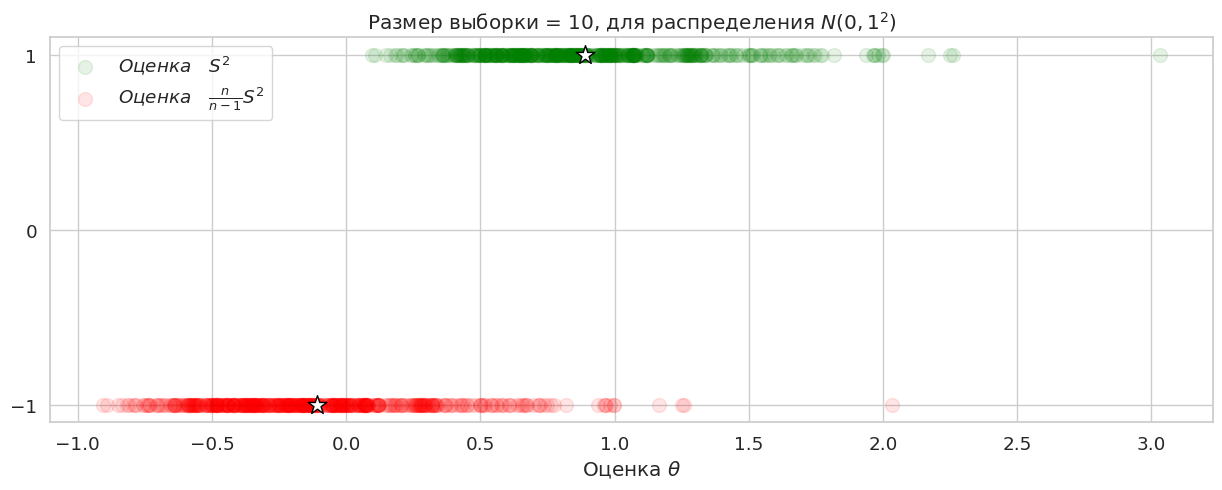

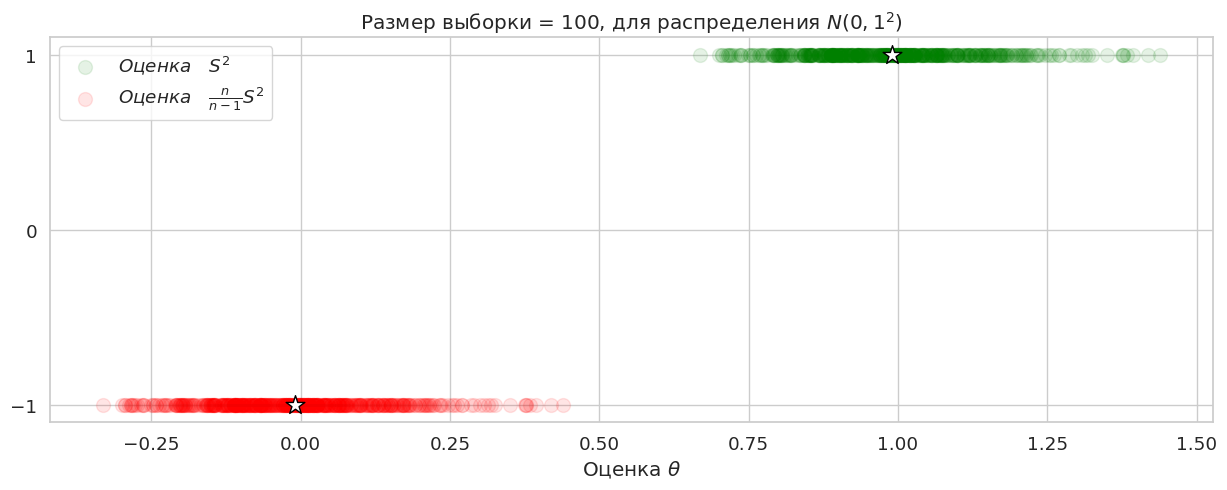

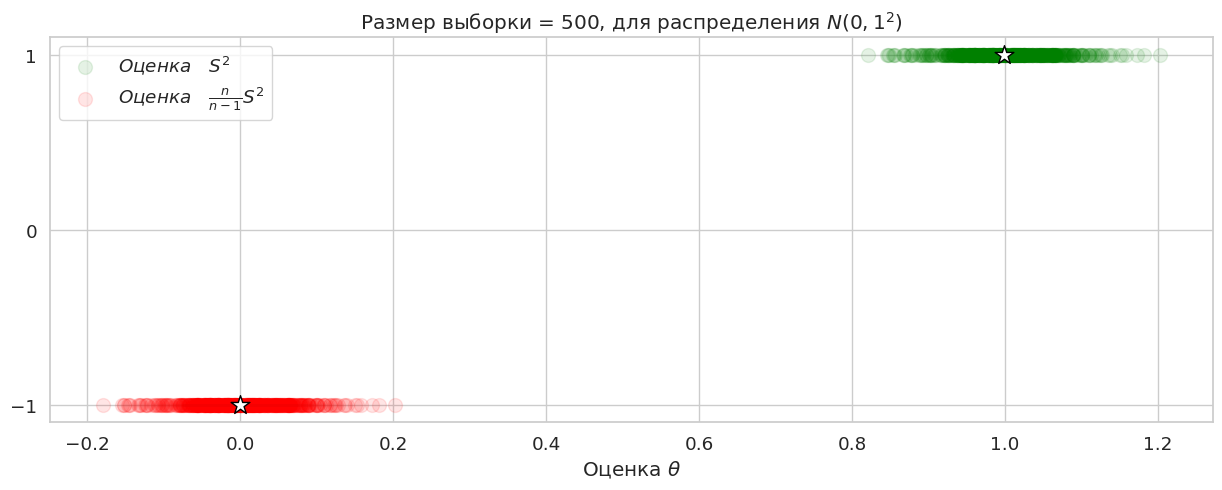

In [4]:
for i, n in enumerate(n_list):
    # Calculate distrebuation and evaluations
    X = np.random.normal(mu, sigma, (n, k))
    S_2 = (X**2).mean(axis=0) - X.mean(axis=0)**2
    S_2_n = S_2 * n / n - 1

    # Plot estimations and means for set n
    plt.scatter(S_2 , np.zeros(k) + 1, alpha=0.1, s=100, color=color_list[0], label='$Оценка \quad S^2$')
    plt.scatter(S_2_n , np.zeros(k) - 1, alpha=0.1, s=100, color=color_list[1], label='$Оценка \quad \\frac{n}{n-1}S^2$')
    plt.scatter(S_2.mean(), 1, marker='*', s=200, color='w', edgecolors='black')
    plt.scatter(S_2_n.mean(), -1, marker='*', s=200, color='w', edgecolors='black')

    # Set title, legend and labels
    plt.title(f'Размер выборки = {n}, для распределения $N({mu}, {sigma}^2)$')
    plt.xlabel(f'Оценка $\\theta$')
    plt.yticks([-1, 0, 1])
    plt.legend()
    plt.show()

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://miptstats.github.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено.

**Решение:**

In [21]:
# Set n and its grid
n = 500
n_grid = (np.arange(n) + 1).reshape(n, 1)

# Generate samples and cumulative means
X = np.random.normal(mu, sigma, (n, k))
X_cummean_2 = (X.cumsum(axis=0) / n_grid) ** 2
X_2_cummean = (X ** 2).cumsum(axis=0) / n_grid

# Make evaluations
S_2 = X_2_cummean - X_cummean_2
S_2_n = S_2 * n_grid / (n_grid - 1)

# Calculate means
theta_1 = S_2.mean(axis=1)
theta_2 = S_2_n.mean(axis=1)

/tmp/ipykernel_4454/737138924.py:12: RuntimeWarning: invalid value encountered in divide
  S_2_n = S_2 * n_grid / (n_grid - 1)


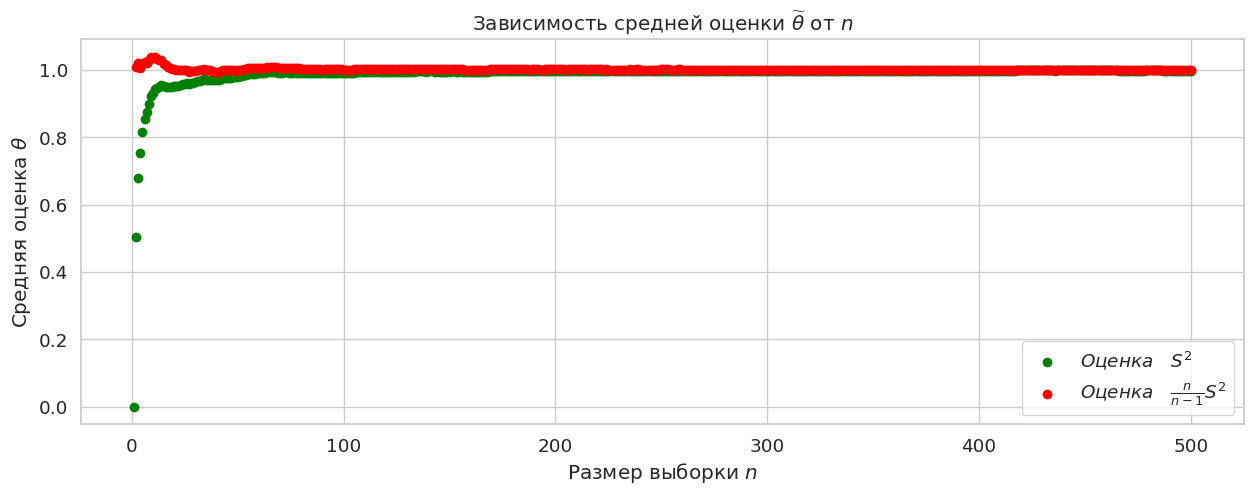

In [22]:
# Plot graphs
plt.scatter(n_grid, theta_1, color=color_list[0], label='$Оценка \quad S^2$')
plt.scatter(n_grid, theta_2, color=color_list[1], label='$Оценка \quad \\frac{n}{n-1}S^2$')

# Ste title, labels, legend
plt.title('Зависимость средней оценки $\widetilde{\\theta}$ от $n$')
plt.xlabel(f'Размер выборки $n$')
plt.ylabel(f'Средняя оценка $\\theta$')
plt.legend()
plt.show();

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

*Замечание.* Для ответа на вопрос достаточно понимания текущего материала, ничего из физики знать не требуется.

### Вывод:

В данной работе исследовались две оценки:
1) $S^2 = \overline{X^2}-\overline{X}^2$
2) $\frac{n}{n-1}S^2$


* Теоретически было получено, что первая оценка является смещенной, а вторая --- поправка первой, для того, чтобы получить несмещенную оценку. Далее был проведен эксперимент, в котором были получены оценки для нормального распределения с параметрами 0, 1 ($\mathcal{N}(0, 1)$) для некоторых размеров выборок. А также построена зависимость средней оценке по выборке от размера выборки. По этому графику можно сказать, что вторая оценка, действительно, является несмещенной.
* На основе полученных данных можно сделать вывод, что несмещенные оценки хорошо себя проявляют при наличии большого числа измерений, поскольку их среднее (мат-ожидание) будет стремиться, к искомой величине, что позволит без труда ее найти. В то время как несмещенная оценка имеет существенное смещение при малых выборках.
* Таким образом в физических экспериментах применяется оценка $\frac{n}{n-1}S^2$, поскольку есть возможность проведения большого числа экспериментов, а значит усреднив результаты можно получить точную оценку искомой величины.

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.